In [1]:
import numpy as np
from tsfit import TSFit
import rw
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib widget

An experimentation tool illustrating the effects of changing $h$ and $m$ on the fitted curve. For larger values of $m$, smaller values of $h$ will give better approximations. Note that for $m>18$ the approximations become jaggy.

interactive(children=(IntSlider(value=500, description='h', max=1000, min=5), IntSlider(value=2, description='…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
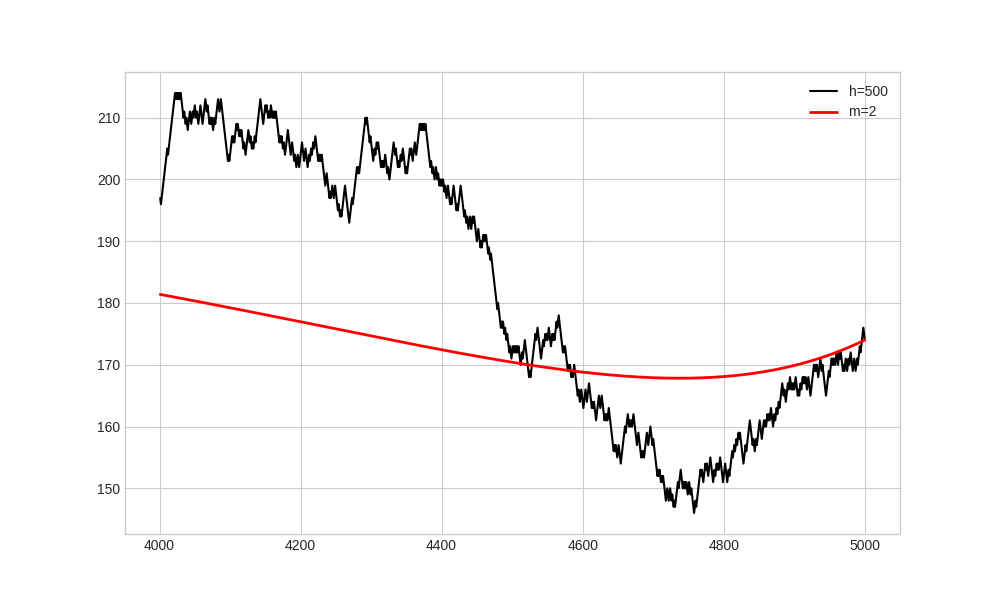

In [2]:
frames = 200
period = 1000
rwalk = rw.simple_rw(5*period)
start = rwalk.size-period

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

@widgets.interact(h=(5, period, 1), m=(1,18,1))
def update(h=period/2, m=2):
    tsfit = TSFit(m, h=h, period=period)
    tsfit.fit(rwalk)
    est = tsfit.transform()
    ax.clear()
    ax.plot(tsfit.values['values'].iloc[start:], c='k', label='h='+str(h))
    ax.plot(est.iloc[start:], c='r', lw=2, label='m='+str(m))
    ax.legend()
